Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise06/exercise06.ipynb)

# Exercise 6

## Problem

In class this week, we saw how to access real-time data about Capital Bikeshare from the internet using their API. We also dealt with the challenge of wrangling those data. We needed to parse a JSON file into a table, and we considered how we might retrieve, store, and combine many JSONs in order to understand how bike availability changed over time.

These real-time data can help us answer questions about how well Captial Bikeshare is being utilized.

See if you can use data from the API (I have already stored and combined it--see below) answer these questions:
- How many bikes were available within the system during each hour over a 24 hour period?
    - Can you graph this over time?
    - Which hour of the day were bikes most available? Least available?

**Bonus:** Can you write a function to estimate how many bikes are <ins>currently being used</ins>, whenever you call the function? This will require loading real-time data from the API and comparing it to stored data.

## Data

I wrote a script, which you can see [here](https://github.com/ncsg/ursp688y_sp2024/blob/main/demos/demo06/cabi_data/get_cabi_free_bikes.py), to retrieve and store JSON data from the `free_bike_status` table in [Capital Bikeshare's](https://capitalbikeshare.com/system-data) GBFS feed every 5 minutes. I ran this script on my computer for a bit more than 24 hours. ([Here's a tutorial](https://realpython.com/run-python-scripts/) on running scripts on the command line, if you're curious.) All of those JSONS are available for you to use. They're stored at [`ursp688y_sp2024/demos/demo06/cabi_data`](https://github.com/ncsg/ursp688y_sp2024/tree/main/demos/demo06/cabi_data).

## Building Off of the Demo

The in-class demo gave us a starting point for how to access real-time JSON data from the API, load saved JSON data, and parse JSON data into a DataFrame.

I have copied what we did in class below and added onto it to develop a single tidy dataframe with records from all the saved JSONs, plus timestamps. This should be all the data you need for the questions above (except the bonus).

See if you can follow my code, then build onto it.

As usual, please wrap the code for your solution in a function, and put that function into a module (you can add to my module, or make a new one if you prefer). Then load your main function from the module and call it in the notebook to demonstrate your solution.


# Setup

In [ ]:
def get_hourly_counts(df):

    # Set the working directory
    os.chdir('/content/drive/MyDrive/Exercises_Data_Science_John/ncsg ursp688y_sp2024 main exercises-exercise06')
     # Import module
    import exercise06
    # Making a get request
    response = requests.get('https://gbfs.lyft.com/gbfs/1.1/dca-cabi/en/free_bike_status.json')# Get JSON content
    data = response.json()
    # Inspect the contents
    data.keys()
    # Make a dataframe out of data for available bikes
    df = pd.DataFrame(data['data']['bikes'])
    # open a single stored json
    with open('cabi_data/cabi_bike_status_2024-03-03_13-11-54.json') as json_data: # Notice how I added 'cabi_data/' to the front of the path to get into that subdirectory where the jsons are stored?
        data = json.load(json_data)
        json_data.close()
        records = data['data']['bikes']
    # convert to a dataframe
    df = pd.DataFrame(records)
    # drop a column that we won't use, just to keep things clean
    df = df.drop(columns=['rental_uris'])
    df = exercise06.load_and_combine_free_bike_status_jsons_as_df('cabi_data')
    df
    import pandas as pd
    import matplotlib.pyplot as plt

    # Convert the 'timestamp' column to datetime dtype if it's not already in datetime format

    df['timestamp'] = pd.to_datetime(df['timestamp'])
    # Extract the hours from the 'timestamp' column
    df['hour'] = df['timestamp'].dt.hour
    # Calculate hourly counts
    hourly_counts = df.groupby('hour').size().reset_index(name='count')
    return hourly_counts

    # the hour with least availabilty
    min_index = hourly_counts['count'].idxmin()
    min_index
    # the hour wth most availability
    max_index = hourly_counts['count'].idxmax()
    max_index

    import matplotlib.pyplot as plt
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(hourly_counts['hour'], hourly_counts['count'], marker='o', linestyle='-')
    plt.title('Counts of Occurrences by Hour')
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.xticks(range(24))  # Set the x-axis ticks to show all 24 hours
    plt.grid(True)
    plt.show()





In [ ]:
# Import packages
import os
import json
import requests
import pandas as pd

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set the working directory
# You will need to change this to your own folder on Google Drive
os.chdir('/content/drive/MyDrive/Exercises_Data_Science_John/ncsg ursp688y_sp2024 main exercises-exercise06')

In [ ]:
# Import module
import exercise06

# Request current data from the API

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Making a get request
response = requests.get('https://gbfs.lyft.com/gbfs/1.1/dca-cabi/en/free_bike_status.json')

# Get JSON content
data = response.json()

# Inspect the contents
data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [ ]:
# Make a dataframe out of data for available bikes
df = pd.DataFrame(data['data']['bikes'])

df.head()

,type,name,lon,is_disabled,lat,rental_uris,fusion_lat,bike_id,is_reserved,fusion_lon
0,electric_bike,228-812,-77.012103,0,38.963211,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,3c37101d60dfb139733e5ecdc28914a5,0,0.0
1,electric_bike,201-455,-77.099550,0,38.848252,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,45985c0233012cbcc65fc99856cf4510,0,0.0
2,electric_bike,688-605,-77.026152,0,38.957604,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,a8f80fa70f0146bf9b56ba9378600341,0,0.0
3,electric_bike,100-790,-76.980872,0,38.887576,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,427c402b963f2c795795ca23c6f8f24f,0,0.0
4,electric_bike,677-929,-76.983288,0,38.922412,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ...",0.0,4d2a1e59e0fcc9019e490d2ed0479af4,0,0.0


# Load JSON data saved in a file

In [ ]:
# open a single stored json
with open('cabi_data/cabi_bike_status_2024-03-03_13-11-54.json') as json_data: # Notice how I added 'cabi_data/' to the front of the path to get into that subdirectory where the jsons are stored?
    data = json.load(json_data)
    json_data.close()

In [ ]:
# see how the data are stored
type(data)

dict

In [ ]:
# see what keys are available
data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [ ]:
# drill into the records for each bike
records = data['data']['bikes']

# convert to a dataframe
df = pd.DataFrame(records)

# drop a column that we won't use, just to keep things clean
df = df.drop(columns=['rental_uris'])

In [ ]:
df.head()

,is_reserved,fusion_lon,fusion_lat,lat,type,is_disabled,bike_id,name,lon
0,0,0.0,0.0,38.887458,electric_bike,0,d94788433d337e4186fb431076b52e91,320-065,-77.025747
1,0,0.0,0.0,38.905328,electric_bike,0,cc49246f85fdc23a6a13b3402ab52b37,222-581,-77.058526
2,0,0.0,0.0,38.908954,electric_bike,0,75c5df17a8236707a7948f509a5ab929,228-812,-77.043055
3,0,0.0,0.0,38.955421,electric_bike,0,4e51a79c1e03962064762ff16013b1a8,570-760,-76.940135
4,0,0.0,0.0,38.892292,electric_bike,0,5983a1b66f086f7905d8aa701fa7b5df,268-224,-77.042912


# Iteratively load all the JSON files and combine them into a single dataframe

Except for the impact statements above, this is probably the only part of the code you'll need to keep. This function wraps all the loading steps. Feel free to delete the cells above if you're not using them.

In [ ]:
df = exercise06.load_and_combine_free_bike_status_jsons_as_df('cabi_data')

df

,is_reserved,fusion_lon,fusion_lat,lat,type,is_disabled,bike_id,name,lon,timestamp
0,0,0.0,0.0,38.887421,electric_bike,0,c562fde62862be6f2506e8e57a888972,320-065,-77.025753,2024-03-03 16:26:08-05:00
1,0,0.0,0.0,38.905326,electric_bike,0,646a619820afa5647acb079ce8c9f48e,222-581,-77.058589,2024-03-03 16:26:08-05:00
2,0,0.0,0.0,38.955422,electric_bike,0,90ba115293f83838c3d13827df90768e,570-760,-76.940089,2024-03-03 16:26:08-05:00
3,0,0.0,0.0,38.892279,electric_bike,0,7054e7062ba9421ee2caca01d57b1549,268-224,-77.042925,2024-03-03 16:26:08-05:00
4,0,0.0,0.0,38.863907,electric_bike,0,c11958dc791685f258f197cd648e8460,201-455,-77.147706,2024-03-03 16:26:08-05:00
...,...,...,...,...,...,...,...,...,...,...
868,0,0.0,0.0,38.832900,electric_bike,0,cde60bafdb999c1b69e6663f47881a07,219-9149,-77.047882,2024-03-04 17:32:43-05:00
869,0,0.0,0.0,38.926001,electric_bike,0,c50d840200fffdb49b8488931bc74c70,224-5066,-76.981154,2024-03-04 17:32:43-05:00
870,0,0.0,0.0,38.996105,electric_bike,0,012ad14f6d6af36a2844cb36b5e20643,420-8187,-77.078046,2024-03-04 17:32:43-05:00
871,0,0.0,0.0,38.894698,electric_bike,0,eceffe6eeadfc29a800a2e60997114e0,860-3490,-77.023192,2024-03-04 17:32:43-05:00


In [ ]:
import pandas as pd

# Convert the 'timestamp' column to datetime dtype if it's not already in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the hours from the 'timestamp' column
df['hour'] = df['timestamp'].dt.hour

# Now the 'hour' column will contain the extracted hour values
print(df['hour'])

0      16
1      16
2      16
3      16
4      16
       ..
868    17
869    17
870    17
871    17
872    17
Name: hour, Length: 285544, dtype: int64


In [ ]:
#hourly_counts = df.groupby(['name', 'hour']).size().reset_index(name='count')
hourly_counts = df.groupby(['hour']).size().reset_index(name='count')
# Now hourly_counts contains the counts of occurrences for each name and hour
print(hourly_counts)

    hour  count
0      0  11134
1      1  11147
2      2  11182
3      3  11236
4      4  11216
5      5  11050
6      6  10716
7      7  10552
8      8  10231
9      9  10508
10    10  10719
11    11  10587
12    12  10552
13    13  10720
14    14  10712
15    15  18121
16    16  20734
17    17  20720
18    18  10298
19    19  10427
20    20  10483
21    21  10640
22    22  10859
23    23  11000


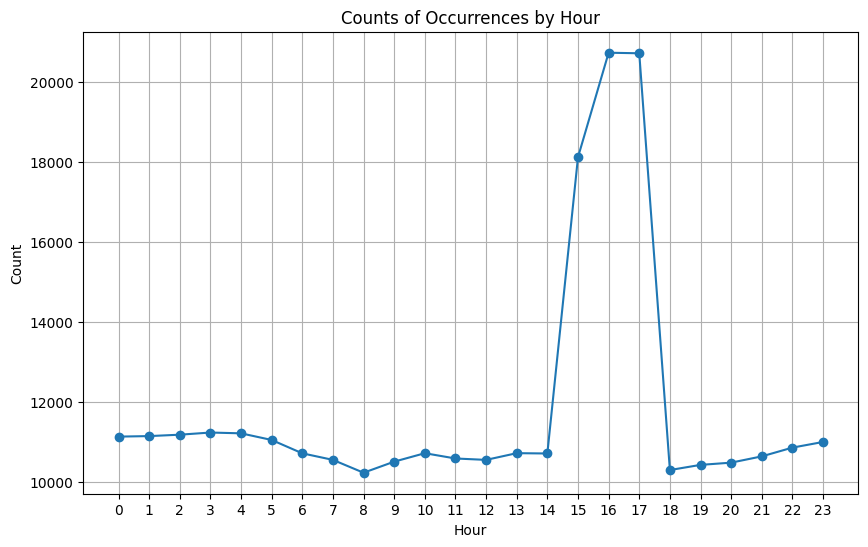

In [ ]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts['hour'], hourly_counts['count'], marker='o', linestyle='-')
plt.title('Counts of Occurrences by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(range(24))  # Set the x-axis ticks to show all 24 hours
plt.grid(True)
plt.show()

In [ ]:
# the hour with least availabilty
min_index = hourly_counts['count'].idxmin()
min_index

8

In [ ]:
max_index = hourly_counts['count'].idxmax()
max_index

16